### 크롤링
- 사람이 하는 데이터 수집을 컴퓨터에게 명령을 내리는 기술
- 많은 양의 데이터를 수집하는 경우에 활용(리뷰, 블로그글, 기사, 카페글 등)
- 핵심: 사람이 하는 행위를 세분화해서 명령을 내려야 한다

### 통신의 기초
- 통신은 요청과 응답의 구조로 이루어져있다
- 클라이언트가 웹사이트를 보기위해서 웹브라우저를 열어서 요청(request) -> 서버가 응답(response)
- 파이썬으로 사이트를 요청하면 서버가 파이썬에게 응답 -> 라이브러리 활용

In [2]:
# requests라이브러리: 브라우저 없이, 파이썬으로 서버에게 데이터를 요청하는 라이브러리
import requests as req

In [4]:
#1. 사이트의 정보를 요청 -> 사람이 브라우저를 열어서 사잍로 접속한다
res = req.get("https://www.naver.com")

### 요청이 발생하면 반드시 응답이 넘어온다
- 응답코드는 3가지 종류
- 200 : 통신에 성공했다. But, 정확한 데이터가 넘어왔는지는 모음
- 400 : 통신에 실패했다. 요청하는 클라이언트의 문제(없는 페이지를 요청했을 때) -> 수정해볼 수 있다
- 500 : 통신에 실패했다. 응답하는 서버의 문제(서버가 터짐) -> 수정해볼 수 없다

In [5]:
# 응답은 res에서 필요한 html 글자만 출력
res.text

'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" 

In [6]:
# res로 받아온 데이터는 String 타입의 데이터다
# 컴퓨터는 웹에서 특정요소를 지짗하려면 태그로 소통해야함
# 문제점 : 넘겨받은 데이터가 전부 String 형태
# 해결방법 : String -> HTML로 변경 (parsing, 데이터 형 변환)
type(res.text)

str

In [8]:
# String -> HTML로 변경해주는 라이브러리
from bs4 import BeautifulSoup as bs

In [10]:
soup = bs(res.text, "lxml") # lxml 번역기정도로 생각하기
soup
print(type(soup))

<class 'bs4.BeautifulSoup'>


- 네이버 페이지에서 "홍대입구 맛집"검색 후 페이지 정보 받아오기

In [13]:
url2 = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%ED%99%8D%EB%8C%80+%EC%9E%85%EA%B5%AC+%EB%A7%9B%EC%A7%91&ackey=wwtwzjp0"
res2 = req.get(url2)
res2

<Response [200]>

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="strict-origin-when-cross-origin" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="홍대 입구 맛집 : 네이버 검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'홍대 입구 맛집'의 네이버 검색 결과입니다." property="og:description"/> <meta content="'홍대 입구 맛집'의 네이버 검색 결과입니다." lang="ko" name="description"/> <title>홍대 입구 맛집 : 네이버 검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_251023.css" rel="stylesheet" type="text/css"/> <l
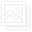
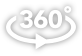
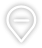
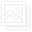
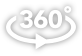
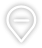

In [14]:
soup2 = bs(res2.text, 'lxml')
soup2

In [15]:
# soup2에게 요청
# 블로그라고 하는 텍스트를 가져다줘 -> a태그에 tab이라는 클래스 선택자로 지정되어 있음
result = soup2.select('a.tab')
result
# 리스트 형태로 조건에 해당하는 모든 데이터를 응답해줌

[<a aria-selected="false" class="tab" href="?ssc=tab.blog.all&amp;sm=tab_jum&amp;query=%ED%99%8D%EB%8C%80+%EC%9E%85%EA%B5%AC+%EB%A7%9B%EC%A7%91" onclick="return goOtherCR(this,'a=tab*b.jmp&amp;r=1&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_blog"></i>블로그</a>,
 <a aria-selected="false" class="tab" href="?ssc=tab.cafe.all&amp;sm=tab_jum&amp;query=%ED%99%8D%EB%8C%80+%EC%9E%85%EA%B5%AC+%EB%A7%9B%EC%A7%91" onclick="return goOtherCR(this,'a=tab*c.jmp&amp;r=2&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_cafe"></i>카페</a>,
 <a aria-selected="false" class="tab" href="?ssc=tab.image.all&amp;where=image&amp;sm=tab_jum&amp;query=%ED%99%8D%EB%8C%80+%EC%9E%85%EA%B5%AC+%EB%A7%9B%EC%A7%91" onclick="return goOtherCR(this,'a=tab*i.jmp&amp;r=3&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_image"></i>이미지</a>,
 <a aria-selected="false" class="tab" href="?ssc=tab.kin.kqna&amp;where=kin&amp;sm=tab_jum&amp;query=%ED%99%8D

In [16]:
# 인덱싱을 통해 원하는 데이터만 추출
# 요소.text
result[0].text

'블로그'

In [17]:
# select_one -> 조건에 해당하는 데이터 중 맨 처음 데이터를 응답해줌
soup2.select_one('a.tab').text

'블로그'

In [19]:
for i in soup2.select('a.tab'):
    print(i.text)

블로그
카페
이미지
지식iN
인플루언서
동영상
쇼핑
뉴스
숏텐츠
어학사전
지도
도서
지식백과
학술정보
전체
블로그
카페
이미지
지식iN
인플루언서
동영상
쇼핑
뉴스
숏텐츠
어학사전
지도
도서
지식백과
학술정보


- 두 번째 실습
  - 네이버에서 서울 날씨 검색해서 온도 가져오기

In [20]:
# 링크
url3 = "https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&ssc=tab.nx.all&query=%EC%84%9C%EC%9A%B8+%EB%82%A0%EC%94%A8&oquery=%ED%99%8D%EB%8C%80+%EC%9E%85%EA%B5%AC+%EB%A7%9B%EC%A7%91&tqi=jeq8NdqX5E0ssF53F6Vssssssk8-239157&ackey=4qfzu78t"
# 페이지 정보 요청 및 응답
res3 = req.get(url3)
res3

<Response [200]>

In [23]:
# HTML문서로 변경(bs)
soup3 = bs(res3.text, "lxml")

In [25]:
# 현재 온도 찾으러가기 select하기
temp = soup3.select('div.temperature_text>strong')
temp[0].text

'현재 온도5.1°'

In [26]:
# 순수 숫자데이터인 온도만 출력
t = soup3.select('span.blind')[3]

In [27]:
# "현재온도"라는 텍스트를 인덱싱해서 extract 추출(삭제)
t.extract()

<span class="blind">현재 온도</span>

In [28]:
temp[0].text

'5.1°'

- 세 번째 실습
  - 삼성전자 주식 검색 후 뉴스 제목 가져오기

In [34]:
# 링크
url4 = "https://search.naver.com/search.naver?sm=tab_sug.top&where=nx&ssc=tab.nx.all&query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90+%EC%A3%BC%EC%8B%9D&oquery=%EC%84%9C%EC%9A%B8+%EB%82%A0%EC%94%A8&tqi=jersxwqVOsVss4e2dRossssss08-497662&acq=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90+%EC%A3%BC%EC%8B%9D&acr=3&qdt=0&ackey=o1op8m5b"

# 응답받기
res4 = req.get(url4)
print(res4)

# 파싱하기
soup4 = bs(res4.text, "lxml")

# 데이터 가져오기
news = soup4.select("span.sds-comps-text.sds-comps-text-ellipsis.sds-comps-text-ellipsis-1.sds-comps-text-type-headline1")

<Response [200]>


In [35]:
news[1].text

'삼성전자 말고…수익률 상위 1% 고수들, 뭐 샀나 보니'

In [36]:
for i in news:
    print(i.text)

삼성전자
삼성전자 말고…수익률 상위 1% 고수들, 뭐 샀나 보니
외국인이 코스피 팔기만 했다고?…우선주 지분율은 오히려 늘었다 [이런...
30년 넘게 성장 멈춘 적 없던 삼성전자, 빅테크업계 숨은 주인공 [전자만...
"공포에 샀어야" AI 거품론 뚫고…'60만닉스' '10만전자' 회복
“삼성전자 공급가 60% 인상” 뉴스에 美 마이크론 4%↑…코스피, 반도...
삼성전자 보유 주식.어수선한 시기 대응법(개인적인 생각임)
삼성전자 주식 추가 매수했던 사람의 최후
삼성전자 손절하고 산 미국주식 ETF 수익률 괜히 팔았나
삼성전자 주식 사는 법 삼전 매수
부인 반대에도 삼성전자 주식 전액 팔아버린 남편의 최후
"1.7조 주식매도" 오너 일가 상속세 마련, 삼성전자 주가 전망?
삼성전자 주가 예측
삼성전자 - 다음금융
삼성전자(005930)의 실시간 주가를 확인해보세요
Samsung Electronics Co Ltd 오늘의 주가 | 005930 실시간 티커
